## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
!pip install --upgrade --user pandas_datareader 
!pip install --upgrade --user pandas  
!pip install --upgrade --user matplotlib 
!pip install --upgrade --user pandas-datareader 

Requirement already up-to-date: pandas_datareader in c:\users\maxlinet\appdata\roaming\python\python38\site-packages (0.10.0)
Requirement already up-to-date: pandas in c:\users\maxlinet\appdata\roaming\python\python38\site-packages (1.5.0)
Requirement already up-to-date: matplotlib in c:\users\maxlinet\appdata\roaming\python\python38\site-packages (3.6.1)
Requirement already up-to-date: pandas-datareader in c:\users\maxlinet\appdata\roaming\python\python38\site-packages (0.10.0)


## Задачи для совместного разбора

In [ ]:
!pip install pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [4]:
import pandas_datareader; pandas_datareader.__version__

from pandas_datareader import DataReader
from datetime import datetime

df = DataReader(
    "AAPL",
    "yahoo",
    start=datetime(2017, 1, 1),
    end=datetime(2018, 12, 31)
)
df.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,29.082500,28.690001,28.950001,29.037500,115127600.0,27.219839
2017-01-04,29.127501,28.937500,28.962500,29.004999,84472400.0,27.189369


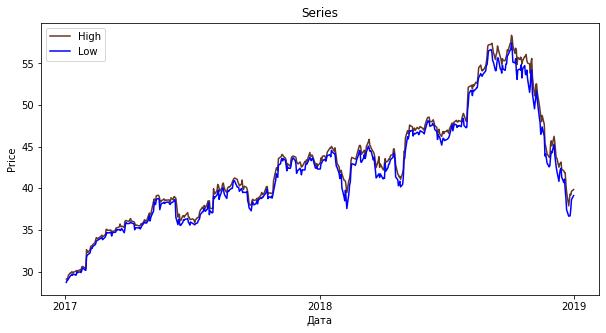

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(df.index, df["High"], c="#643624", label="High")
ax.plot(df.index, df["Low"], c="blue", label="Low")
ax.legend(loc=2)
ax.set_xlabel("Дата")
ax.set_ylabel("Price")
ax.set_title("Series")

ax.xaxis.set_major_locator(mdates.YearLocator())

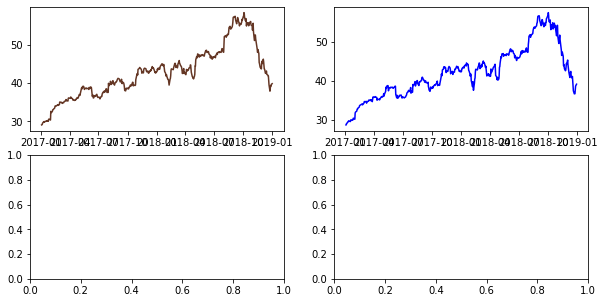

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(10, 5))

axs[0, 0].plot(df.index, df["High"], c="#643624", label="High")
axs[0, 1].plot(df.index, df["Low"], c="blue", label="Low")

Text(0.5, 1.0, 'QWE')

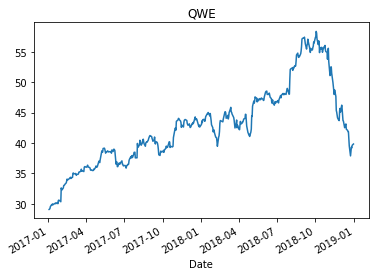

In [7]:
ax = df["High"].plot.line()
ax.set_title("QWE")

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

In [8]:
df["year"] = df.index.year.astype(str)
df["quarter"] = df.index.quarter.astype(str)
df

,High,Low,Open,Close,Volume,Adj Close,year,quarter
Date,,,,,,,,
2017-01-03,29.082500,28.690001,28.950001,29.037500,115127600.0,27.219839,2017,1
2017-01-04,29.127501,28.937500,28.962500,29.004999,84472400.0,27.189369,2017,1
2017-01-05,29.215000,28.952499,28.980000,29.152500,88774400.0,27.327635,2017,1
2017-01-06,29.540001,29.117500,29.195000,29.477501,127007600.0,27.632292,2017,1
2017-01-09,29.857500,29.485001,29.487499,29.747499,134247600.0,27.885387,2017,1
...,...,...,...,...,...,...,...,...
2018-12-24,37.887501,36.647499,37.037498,36.707500,148676800.0,35.487953,2018,4
2018-12-26,39.307499,36.680000,37.075001,39.292500,234330000.0,37.987068,2018,4
2018-12-27,39.192501,37.517502,38.959999,39.037498,212468400.0,37.740547,2018,4


TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

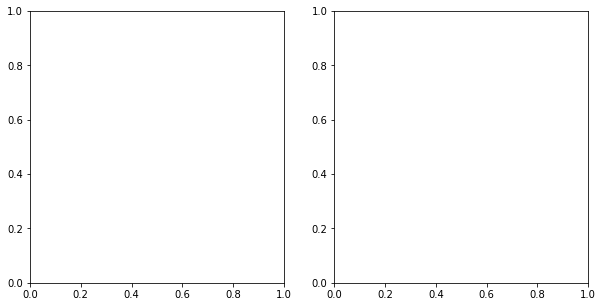

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(
    data=df,
    x="High",
    y="year",
    hue="quarter",
    ax=ax1
)

ax1.set_title("QWE")

sns.boxplot(
    data=df,
    x="Low",
    y="year",
    hue="quarter",
    ax=ax2
)

## Лабораторная работа №5

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 31.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня, по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

In [10]:
average_ratings = np.load('average_ratings.npy')
average_ratings

array([[ 5.        ,  5.01310274,  5.02623981, ...,  5.52281922,
         5.53729203,  5.52281922],
       [ 7.        ,  6.97074954,  7.        , ..., 10.        ,
        10.        , 10.        ],
       [ 3.        ,  2.9968611 ,  2.99372548, ...,  2.99372548,
         2.99059315,  2.98746409]])

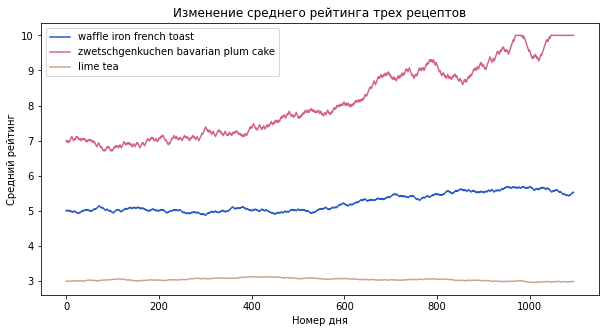

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(average_ratings[0], c='#2B59C3', label="waffle iron french toast")
ax.plot(average_ratings[1], c='#D36582', label="zwetschgenkuchen bavarian plum cake")
ax.plot(average_ratings[2], c='#C9A690', label="lime tea")

ax.set_xlabel("Номер дня")
ax.set_ylabel("Средний рейтинг")
ax.set_title("Изменение среднего рейтинга трех рецептов")
ax.legend()

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 31.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


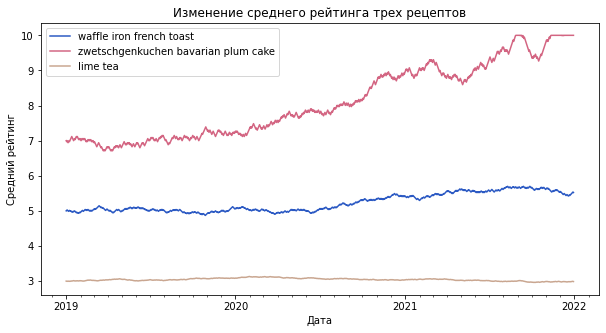

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

dates = pd.date_range(start = '01.01.2019', end = '12.30.2021', freq = 'D')

ax.plot(dates, average_ratings[0], c='#2B59C3', label="waffle iron french toast")
ax.plot(dates, average_ratings[1], c='#D36582', label="zwetschgenkuchen bavarian plum cake")
ax.plot(dates, average_ratings[2], c='#C9A690', label="lime tea")

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())

ax.set_xlabel("Дата")
ax.set_ylabel("Средний рейтинг")
ax.set_title("Изменение среднего рейтинга трех рецептов")
ax.legend()

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

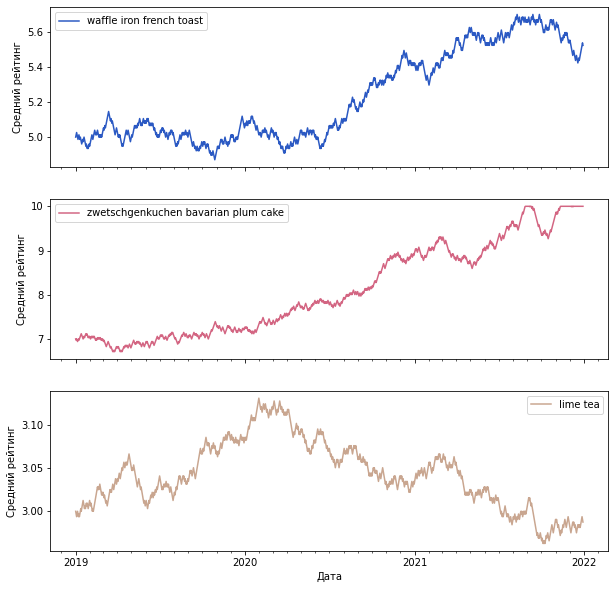

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

dates = pd.date_range(start = '01.01.2019', end = '12.30.2021', freq = 'D')

ax1.plot(dates, average_ratings[0], c='#2B59C3', label="waffle iron french toast")
ax2.plot(dates, average_ratings[1], c='#D36582', label="zwetschgenkuchen bavarian plum cake")
ax3.plot(dates, average_ratings[2], c='#C9A690', label="lime tea")

ax1.xaxis.set_minor_locator(mdates.MonthLocator())
ax2.xaxis.set_minor_locator(mdates.MonthLocator())

ax3.xaxis.set_major_locator(mdates.YearLocator())
ax3.xaxis.set_minor_locator(mdates.MonthLocator())

ax3.set_xlabel("Дата")

ax1.set_ylabel("Средний рейтинг")
ax2.set_ylabel("Средний рейтинг")
ax3.set_ylabel("Средний рейтинг")

ax1.legend()
ax2.legend()
ax3.legend()

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


In [17]:
visitors = np.load('visitors.npy')
visitors

array([2311, 2023, 1839, 1523, 1371, 1217, 1098,  958,  862,  724,  654,
        558,  526,  454,  383,  372,  356,  274,  239,  236,  214,  179,
        180,  140,  138,  112,  102,  101,   74,   81,   70,   74,   53,
         57,   52,   44,   38,   30,   37,   27,   20,   21,   16,   16,
         12,    9,   13,   10,   13,    7,    5,    8,    6,    8,    9,
          4,    3,    4,    4,    2,    2,    3,    2,    2,    2,    2,
          2,    3,    2,    2,    3,    2,    2,    2,    2,    3,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2])

Text(0.5, 0.98, 'Изменение количества пользователей в линейном и логарифмическом масштабе')

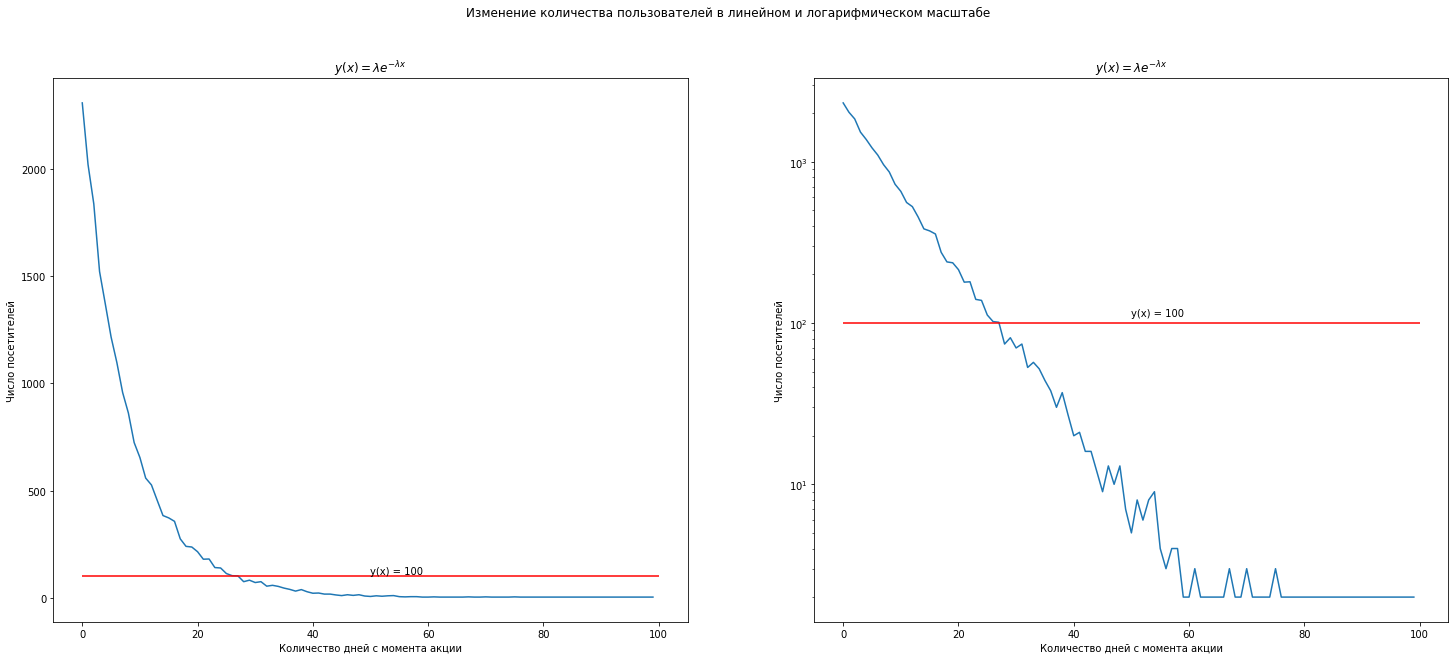

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))

ax1.plot(visitors)
ax2.plot(visitors)
ax2.set_yscale('log')

ax1.set_title("$y(x)=λe^{−λx}$")
ax2.set_title("$y(x)=λe^{−λx}$")

ax1.hlines(100, 0, 100, color='r')
ax2.hlines(100, 0, 100, color='r')

ax1.text(50, 100+10, 'y(x) = 100')
ax2.text(50, 100+10, 'y(x) = 100')

ax1.set_xlabel('Количество дней с момента акции')
ax2.set_xlabel('Количество дней с момента акции')

ax1.set_ylabel('Число посетителей')
ax2.set_ylabel('Число посетителей')

fig.suptitle("Изменение количества пользователей в линейном и логарифмическом масштабе")

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [19]:
reviews = pd.read_csv('reviews_sample.csv', index_col = 0, parse_dates=['date'],infer_datetime_format='%Y-%m-%d')
recipes = pd.read_csv('recipes_sample.csv')
recipes

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN
...,...,...,...,...,...,...,...,...
29995,zurie s holey rustic olive and cheddar bread,267661,80,200862,2007-11-25,16.0,this is based on a french recipe but i changed...,10.0
29996,zwetschgenkuchen bavarian plum cake,386977,240,177443,2009-08-24,NaN,"this is a traditional fresh plum cake, thought...",11.0
29997,zwiebelkuchen southwest german onion cake,103312,75,161745,2004-11-03,NaN,this is a traditional late summer early fall s...,NaN
29998,zydeco soup,486161,60,227978,2012-08-29,NaN,this is a delicious soup that i originally fou...,NaN


5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

In [20]:
recipes.loc[recipes['minutes'] < 5, 'Время рецепта'] = 'короткий'
recipes.loc[(recipes['minutes']>=5) & (recipes['minutes']<50), 'Время рецепта'] = 'средний'
recipes.loc[recipes['minutes']>=50, 'Время рецепта'] = 'длинный'

In [21]:
steps_mean = recipes.groupby('Время рецепта').mean('n_steps')['n_steps']
group_number = recipes.groupby('Время рецепта').count()['id']

<AxesSubplot: title={'center': 'Размеры групп рецептов'}, ylabel='id'>

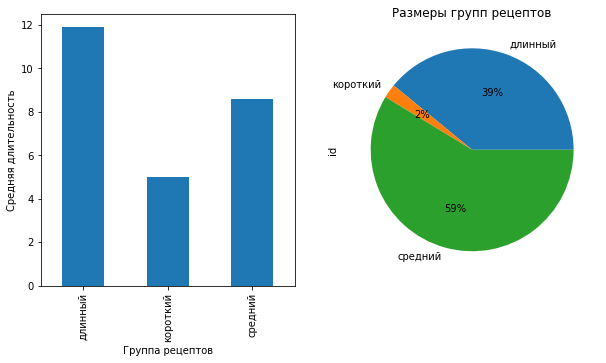

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

steps_mean.plot.bar(ax=ax1)
ax1.set_xlabel('Группа рецептов')
ax1.set_ylabel('Средняя длительность')
ax2.set_title('Размеры групп рецептов')

group_number.plot.pie(ax=ax2, autopct='%1.0f%%')

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

In [23]:
reviews1 = reviews.copy()

In [24]:
drop_labels = reviews1[(reviews1['date'].dt.year != 2008) & (reviews1['date'].dt.year != 2009) ].index

In [25]:
reviews1.drop(drop_labels, axis=0)

,user_id,recipe_id,date,rating,review
187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...
1023302,308434,11252,2008-12-14,5,Oh Bergy! These wonderful little cakes are aw...
264646,151754,285773,2008-09-04,0,"This was a very moist cornbread, even two days..."
126930,379985,150499,2008-08-21,5,I really liked this recipe. It's perfect to ma...
...,...,...,...,...,...
532061,335737,36548,2008-04-22,5,If only there were more stars to give! Normall...
698638,1186693,394518,2009-12-09,0,I must have done something wrong! Mine were v...
344676,724631,314698,2008-10-14,5,"5 Stars, The Hunter said the mushrooms and sau..."
1013457,1270706,335534,2009-05-17,4,This recipe was great! I made it last night. I...


Text(0.5, 0.98, 'Гистограммы рейтинга отзывов в 2008 и 2009 годах')

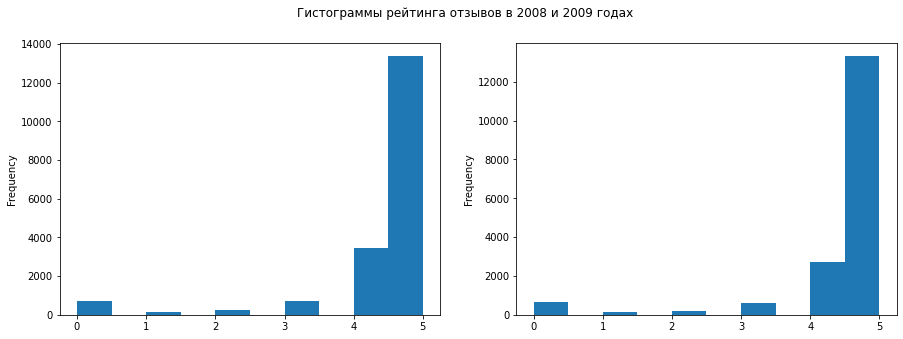

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5),  sharex=True)

reviews1[reviews1['date'].dt.year == 2008]['rating'].plot.hist(ax=ax1)
reviews1[reviews1['date'].dt.year == 2009]['rating'].plot.hist(ax=ax2)

fig.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах')

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

Text(0.5, 1.0, 'Диаграмма рассеяния n_steps и n_ingredients')

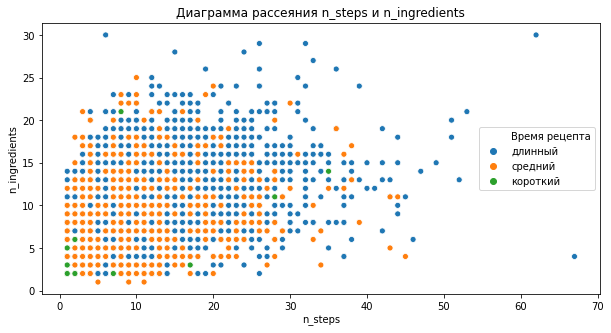

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

sns.scatterplot(x =recipes['n_steps'], y = recipes['n_ingredients'], hue = recipes['Время рецепта'], ax=ax)
ax.set_title('Диаграмма рассеяния n_steps и n_ingredients')

Линейная зависимость не наблюдается, так как точки слишком сильно разбросаны

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

In [28]:
recipes_reviews = pd.merge(recipes, reviews, left_on = 'id', right_on = 'recipe_id', copy = False)
recipes_reviews

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients,Время рецепта,user_id,recipe_id,date,rating,review
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0,длинный,743566,44123,2008-01-28,5,I lived in San Diego for 19 years and would g...
1,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0,длинный,76503,44123,2003-06-03,5,This soup is the Bomb! Don't hesitate to try.....
2,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0,длинный,34206,44123,2003-03-23,5,I just can't say enough about how wonderful th...
3,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN,средний,494084,67664,2012-09-26,5,These are great! I use 100% (organic) juice a...
4,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN,средний,303445,67664,2012-03-31,5,"Very, very good. My son loves these. He like..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126691,zydeco soup,486161,60,227978,2012-08-29,NaN,this is a delicious soup that i originally fou...,NaN,длинный,305531,486161,2013-07-18,5,Delish! I made this as directed but used a smo...
126692,zydeco soup,486161,60,227978,2012-08-29,NaN,this is a delicious soup that i originally fou...,NaN,длинный,1271506,486161,2012-09-10,5,Now the only substitution I made was African B...
126693,zydeco soup,486161,60,227978,2012-08-29,NaN,this is a delicious soup that i originally fou...,NaN,длинный,724631,486161,2014-01-07,5,"Very tasty soup, moderate spiciness (even afte..."
126694,zydeco soup,486161,60,227978,2012-08-29,NaN,this is a delicious soup that i originally fou...,NaN,длинный,133174,486161,2013-07-18,5,Very yummy indeed. A spicy sausage was used i...


In [29]:
df_temp = recipes_reviews[[ "minutes", "n_steps", "n_ingredients", "rating"]]
df_heatmap = df_temp.corr()

Text(0.5, 1.0, 'Корреляционная матрица числовых столбцов таблиц recipes и reviews')

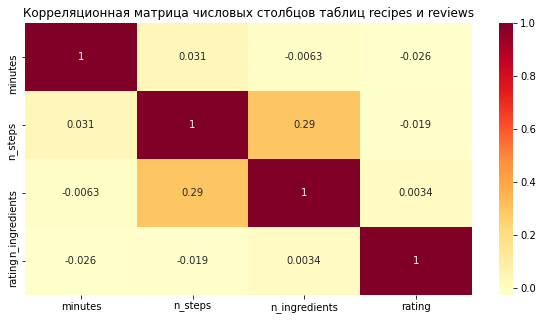

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

sns.heatmap(df_heatmap, annot = True, cmap = 'YlOrRd', ax = ax)
ax.set_title('Корреляционная матрица числовых столбцов таблиц recipes и reviews')